In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [2]:
iris=load_iris()#cargo los datos

In [3]:
print(iris.data.shape)
print(iris.target.shape)

(150, 4)
(150,)


In [4]:
X_train,X_test,y_train,y_test=train_test_split(iris.data,iris.target,train_size=2/3,stratify=iris.target)#separo los datos

In [5]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
print(type(X_train))
print(type(X_test))
print(type(y_train))
print(type(y_test))

(100, 4)
(50, 4)
(100,)
(50,)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [7]:

'''
X_train=[6.4, 3.2, 4.5, 1.5],
       [5.1, 2.5, 3. , 1.1],
       [5.2, 2.7, 3.9, 1.4],
       [6.2, 2.8, 4.8, 1.8]

       100-----


y_train=[1, 1, 1, 2, 2, 0, 1, 0, 2, 2, 0, 1, 0, 1, 2, 0,

       100-----





X_test=[4.4, 3. , 1.3, 0.2],
       [6. , 2.9, 4.5, 1.5],
       [5.1, 3.4, 1.5, 0.2],
       [4.6, 3.6, 1. , 0.2],

       50------

       
       

y_test=[0, 1, 0, 0, 2, 1, 2, 2, 0, 0, 0, 1, 2,

       50------
       
       
       
       
       '''

'X_train=[6.4, 3.2, 4.5, 1.5],\n       [5.1, 2.5, 3. , 1.1],\n       [5.2, 2.7, 3.9, 1.4],\n       [6.2, 2.8, 4.8, 1.8],\n       \n       \n       \n       \n       \n       \n       '

In [11]:
clf=DecisionTreeClassifier()#defino el algoritmo

In [12]:
clf.fit(X_train,y_train)# entreno el modelo con los de train

DecisionTreeClassifier()

In [13]:
y_test_pred=clf.predict(X_test)#hago la predicion sobre el x de test

In [14]:
sc=accuracy_score(y_test,y_test_pred)#puntuacion con el test original y el generado
print(sc)

0.94


In [15]:
import pandas as pd

In [33]:
juntosOtro=pd.DataFrame(columns=["Prediccion","Original"])
juntosOtro["Prediccion"]=y_test_pred
juntosOtro["Original"]=y_test
print(juntosOtro)

    Prediccion  Original
0            0         0
1            1         1
2            0         0
3            0         0
4            2         2
5            1         1
6            2         2
7            2         2
8            0         0
9            0         0
10           0         0
11           1         1
12           2         2
13           0         0
14           2         2
15           2         2
16           0         0
17           2         2
18           1         1
19           1         1
20           0         0
21           0         0
22           2         2
23           1         1
24           1         1
25           0         0
26           0         0
27           0         0
28           1         2
29           1         1
30           1         1
31           2         2
32           0         0
33           1         1
34           2         2
35           2         1
36           0         0
37           2         2
38           1         2


In [16]:
juntos = pd.DataFrame(list(zip(y_test_pred, y_test)),columns =['Prediccion', 'Original'])
print(juntos)#zip junta en un iterador y empareja las muestras

    Prediccion  Original
0            0         0
1            1         1
2            0         0
3            0         0
4            2         2
5            1         1
6            2         2
7            2         2
8            0         0
9            0         0
10           0         0
11           1         1
12           2         2
13           0         0
14           2         2
15           2         2
16           0         0
17           2         2
18           1         1
19           1         1
20           0         0
21           0         0
22           2         2
23           1         1
24           1         1
25           0         0
26           0         0
27           0         0
28           1         2
29           1         1
30           1         1
31           2         2
32           0         0
33           1         1
34           2         2
35           2         1
36           0         0
37           2         2
38           1         2


In [17]:
juntos["Diferente"]=0#inserta fila con ceros

In [21]:
print(juntos.iloc[5]["Prediccion"])
print(juntos.at[9,"Prediccion"])

1
0


In [22]:
for i in range(len(juntos)):
    if(juntos.iloc[i]["Prediccion"]!=juntos.iloc[i]["Original"]):#recorro elementos y los comparo
        juntos.at[i,"Diferente"]=1#pongo en la celda 1

    
        

In [24]:
cantidad=len(juntos)


#agrupa por diferente y los cuenta
df2 = juntos.groupby(["Diferente"])["Diferente"].count()


In [28]:
suma=juntos["Diferente"].sum()
print(suma)

3


In [29]:

prop=df2.iloc[0]/cantidad#divido los correctos entre todos
print("La proporcion es de: ",prop)


La proporcion es de:  0.94


In [30]:
confusion_matrix=confusion_matrix(y_test_pred,y_test)#matriz de confusion con los orginales y los de test
print(confusion_matrix)


[[17  0  0]
 [ 0 16  2]
 [ 0  1 14]]


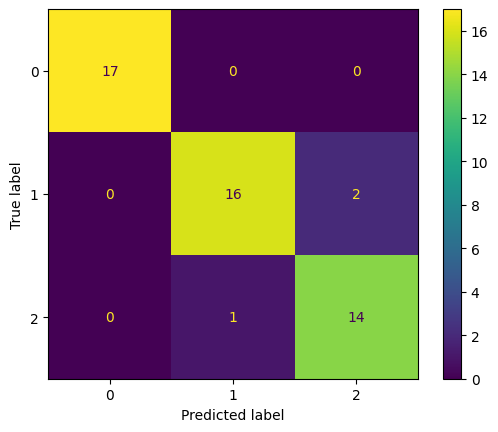

In [31]:
from sklearn import metrics
import matplotlib.pyplot as plt
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0,1,2])
cm_display.plot()
plt.show()

In [ ]:
#fila de arriba: true positives, false positive
#fila de abajo: false negatives, true negative
#false positive: predijo true y era false
#false negative: predijo false y era true